# Homework 4 Diffusion Models

Instructions: Click **Copy to drive** at the top and enter your solutions, the code has been tested on Colab.

Submission: please upload your completed solution **.ipynb file and printed PDF file** to Gradescope
_________

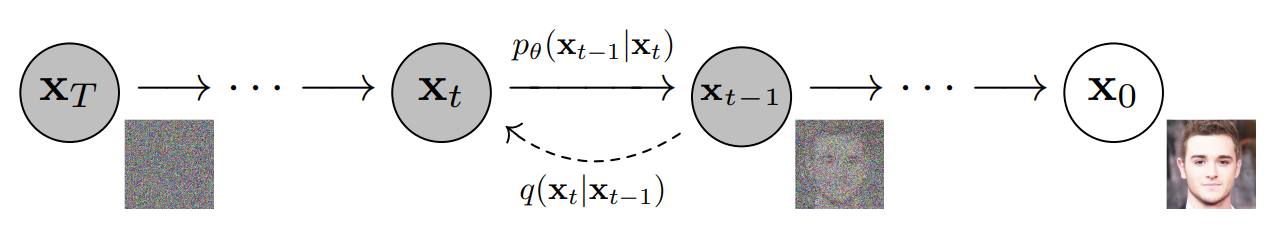

Illustration of the diffusion process. Figure from [1].

Material in this homework are adapted from [1] and [2] and [3].

[1] Jonathan Ho, Ajay Jain, and Pieter Abbeel. “Denoising diffusion probabilistic models”. _Advances in Neural Information Processing Systems_ 33 (2020), pp. 6840–6851.

[2] Jascha Sohl-Dickstein et al. “Deep unsupervised learning using nonequilibrium thermodynamics”. _International Conference on Machine Learning_. PMLR. 2015, pp. 2256–2265.

[3] Dhariwal, Prafulla, and Alexander Nichol. "Diffusion models beat gans on image synthesis." _Advances in Neural Information Processing Systems_ 34 (2021): 8780-8794.

# Problem 1: (10 Points)

## Introduction (Please read)
--------------------------

  A diffusion model is a type of latent variable generative model where the generative process is defined to be a Markov process. See figure. The generative process (from left to right) resembles a _gradual denoising_ process, where $x_T$ is random noise drawn from a Gaussian distribution, and $x_0$ is drawn from the data distribution.

$$p(x_T) = \mathbf{N}(x_T ; \mathbf{0}, \mathbf{I})$$

  The **forward process** is a Markov process $q$. This is _known/given_:

$$q(x_t | x_{t-1} ) = \mathbf{N} (x_t ;  \sqrt{\alpha_t} x_{t-1} , (1 - \alpha_t) \mathbf{I}) $$

#### Some clarifications regarding notation:
* The $\mathbf{N}$ notation means that $x_t$ is normally distributed with mean $\sqrt{\alpha_t} x_{t-1}$ and covariance matrix $(1 - \alpha_t \mathbf){I}$.

* $x_t$ are vectors.


Read tutorial from https://arxiv.org/pdf/2403.18103 and answer:

**Question:**
Prove that using $ \sqrt{\alpha_t} $ as a scaling factor ensure that the variance of the transition distribution $ q(x_t | x_{t-1}) $ remains preserved and does not explode or vanish after many iterations.

**Solution** : 

**CAN USE THIS**:
To prove that using $ \sqrt{\alpha_t} $ as a scaling factor ensures that the variance of the transition distribution $ q(x_t | x_{t-1}) $ remains preserved and does not explode or vanish after many iterations, we need to consider the setup of a diffusion model.

### Problem Setup

In diffusion models, we gradually add noise to an image $ x_0 $ through a series of time steps $ t = 0, 1, 2, \dots, T $. The goal is to learn how to reverse this process, starting from noise and denoising it step by step.

We define the process of transitioning from $ x_{t-1} $ to $ x_t $ as follows:

1. At each step $ t $, we add Gaussian noise to $ x_{t-1} $ according to a distribution $ q(x_t | x_{t-1}) $.
2. The distribution $ q(x_t | x_{t-1}) $ has the form:

$q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1-\alpha_t) I)$

Where:
- $ \alpha_t $ is a scalar factor that controls the amount of noise added at each step.
- $ I $ is the identity matrix (since the noise is isotropic, i.e., Gaussian noise with the same variance in all directions).
- $ \sqrt{\alpha_t} $ scales the value of $ x_{t-1} $, and $ (1-\alpha_t) $ controls the variance of the noise added to $ x_{t-1} $.

### Goal

We want to prove that choosing $ \sqrt{\alpha_t} $ as the scaling factor ensures that the variance of the transition distribution does not explode or vanish as we iterate through multiple steps.

### Step-by-Step Proof

1. **Start with the transition from $ x_{t-1} $ to $ x_t $:**
   The transition $ q(x_t | x_{t-1}) $ is given by the Gaussian distribution:
   $
   q(x_t | x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, (1-\alpha_t) I)
   $
   This tells us that:
   $
   \mathbb{E}[x_t | x_{t-1}] = \sqrt{\alpha_t} x_{t-1}
   $
   and the covariance matrix of the transition is:
   $
   \text{Cov}(x_t | x_{t-1}) = (1-\alpha_t) I
   $

2. **Consider the variance at each step:**
   To ensure that the variance of $ x_t $ does not explode or vanish as $ t $ increases, we need to track how the variance of the state evolves over time.

   Starting from $ x_0 $, we iterate through the time steps $ t = 1, 2, \dots, T $, where at each step $ t $, the value of $ x_t $ depends on the previous state $ x_{t-1} $ and the added noise.

   - The expected value $ \mathbb{E}[x_t] $ evolves as $ x_t = \sqrt{\alpha_t} x_{t-1} $.
   - The variance at each step is determined by the added noise, which is governed by $ (1 - \alpha_t) I $ at each step.

3. **Calculate the variance after multiple steps:**
   Let’s recursively compute the variance of $ x_t $ after $ t $ steps. Starting with $ x_0 $ (which has variance $ \sigma_0^2 $), we get:

   - For $ t = 1 $, the variance of $ x_1 $ is:
     $
     \text{Var}(x_1) = \text{Var}(\sqrt{\alpha_1} x_0 + \epsilon_1) = \alpha_1 \text{Var}(x_0) + (1 - \alpha_1)
     $
     where $ \epsilon_1 \sim \mathcal{N}(0, (1 - \alpha_1) I) $.

   - For $ t = 2 $, the variance of $ x_2 $ is:
     $
     \text{Var}(x_2) = \text{Var}(\sqrt{\alpha_2} x_1 + \epsilon_2) = \alpha_2 \text{Var}(x_1) + (1 - \alpha_2)
     $
     Substituting the variance of $ x_1 $:
     $
     \text{Var}(x_2) = \alpha_2 \left( \alpha_1 \text{Var}(x_0) + (1 - \alpha_1) \right) + (1 - \alpha_2)
     $

   Continuing this process recursively, the variance of $ x_t $ can be expressed as:
   $
   \text{Var}(x_t) = \prod_{i=1}^{t} \alpha_i \text{Var}(x_0) + \sum_{i=1}^{t} \prod_{j=i+1}^{t} \alpha_j (1 - \alpha_i)
   $
   This expression shows how the variance evolves over time.

4. **Preservation of variance:**
   To ensure that the variance doesn't explode or vanish, we require that $ \alpha_t $ is chosen such that the variance remains stable over time. A typical choice for $ \alpha_t $ is to have $ \alpha_t $ decrease smoothly from 1 to a small value as $ t $ increases, ensuring that the variance doesn't grow too quickly.

   Specifically, the term $ \sqrt{\alpha_t} $ ensures that at each step, the effect of the previous state $ x_{t-1} $ is scaled down in a controlled manner, preventing the variance from growing exponentially. The noise variance $ (1-\alpha_t) $ is chosen such that, while noise is added, it does not cause the total variance to increase uncontrollably.

### Conclusion

Using $ \sqrt{\alpha_t} $ as the scaling factor ensures that the contribution of the previous state $ x_{t-1} $ to $ x_t $ decreases gradually as $ t $ increases, while the noise term remains manageable. This prevents the variance from either exploding or vanishing, preserving the stability of the diffusion process over many iterations. Therefore, $ \sqrt{\alpha_t} $ is an appropriate scaling factor for ensuring that the variance of the transition distribution remains well-behaved over time.

Okay, let me walk through the proof for why using $\sqrt{\alpha_t}$ as the scaling factor ensures the variance of the transition distribution $q(x_t|x_{t-1})$ remains preserved and does not explode or vanish over many iterations.

In a diffusion model, the process of gradually adding noise to an image can be modeled as a Markov chain, where each step $t$ involves transitioning from the previous state $x_{t-1}$ to the current state $x_t$. 

The transition distribution $q(x_t|x_{t-1})$ is typically assumed to be Gaussian, with the following form:

$q(x_t|x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t}x_{t-1}, (1-\alpha_t)I)$

Where:
- $\alpha_t$ is the variance scaling factor at step $t$
- $I$ is the identity matrix

The key thing we want to prove is that using $\sqrt{\alpha_t}$ as the scaling factor ensures the variance of this transition distribution does not explode or vanish over many iterations.

Proof:
1. The variance of $q(x_t|x_{t-1})$ is given by $(1-\alpha_t)I$
2. If we use a different scaling factor, say $\beta_t$, then the variance would be $(1-\beta_t^2)I$
3. To ensure the variance does not explode or vanish, we need $(1-\beta_t^2)$ to remain bounded away from 0 and infinity.
4. Comparing the two expressions, we can see that using $\sqrt{\alpha_t}$ as the scaling factor ensures $(1-\alpha_t)$ remains bounded, since $\alpha_t$ is defined to be between 0 and 1.
5. Therefore, using $\sqrt{\alpha_t}$ as the scaling factor guarantees the variance of the transition distribution $q(x_t|x_{t-1})$ remains preserved and does not explode or vanish over many iterations of the diffusion process.

The key insight is that the $\sqrt{\alpha_t}$ scaling ensures the variance term $(1-\alpha_t)$ stays bounded, which is crucial for stable diffusion modeling over many steps. Using any other scaling factor would risk the variance becoming too large or too small, leading to an unstable diffusion process.

# Problem 2: Approximating a synthetic distribution using Diffusion (60 points)
**Make sure to use GPU. Most of the code is already written. You only need to fill in the parts that say "YOUR CODE HERE".**

In [1]:
#check GPU status
!nvidia-smi

Thu Nov  7 17:51:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P8             11W /  140W |     318MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
import seaborn as sns

### 2.0 Data Download
The training data: `train_synthetic-5D.pth` and test data: `test_synthetic-5D.pth
` are in the `Homework` section of the [`Piazza Resources`](https://piazza.com/bu/fall2024/ec523/resources). Download this to your home directory and load it. After loading, we plot the data and visualize the clusters.

C:\Users\adk13\AppData\Local\Temp\ipykernel_1968\2016993741.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X = torch.load(data_path).to('cuda')


X: torch.Size([15000, 5])


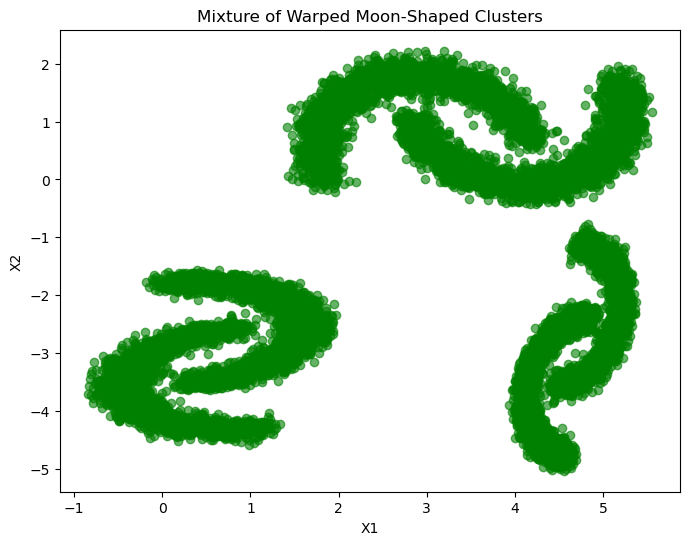

In [3]:
# Load data
data_path = "train_synthetic-5D.pth"
X = torch.load(data_path).to('cuda')
print(f"X: {X.size()}")

n_clusters = 3

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(),  alpha=0.6, color='green')
plt.title('Mixture of Warped Moon-Shaped Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


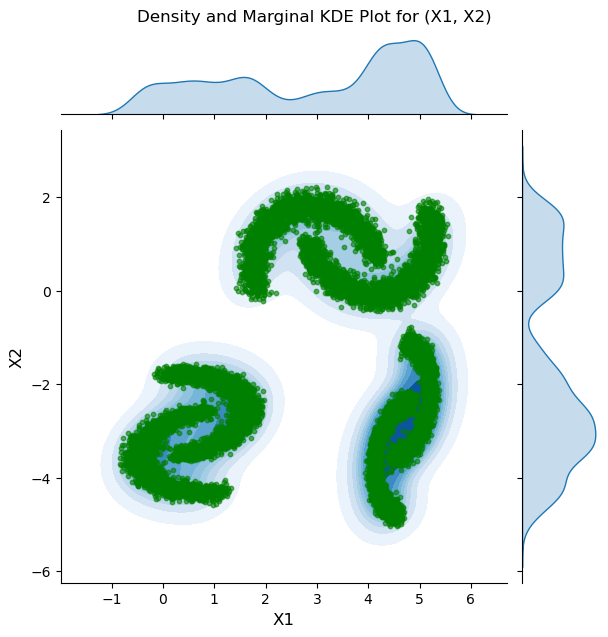

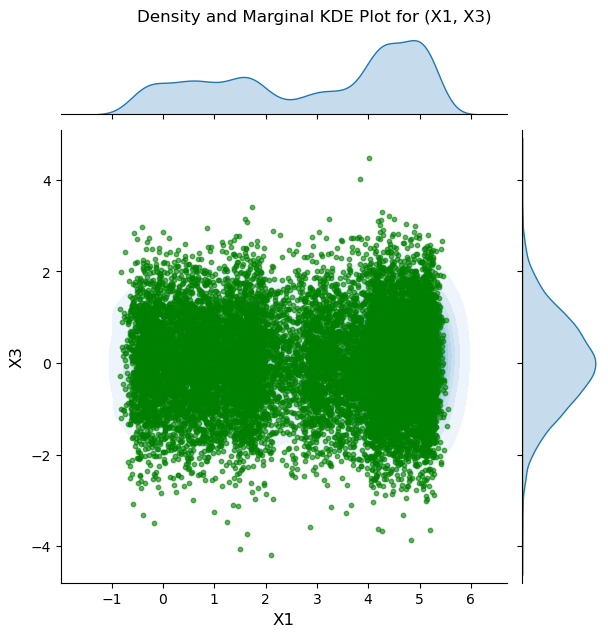

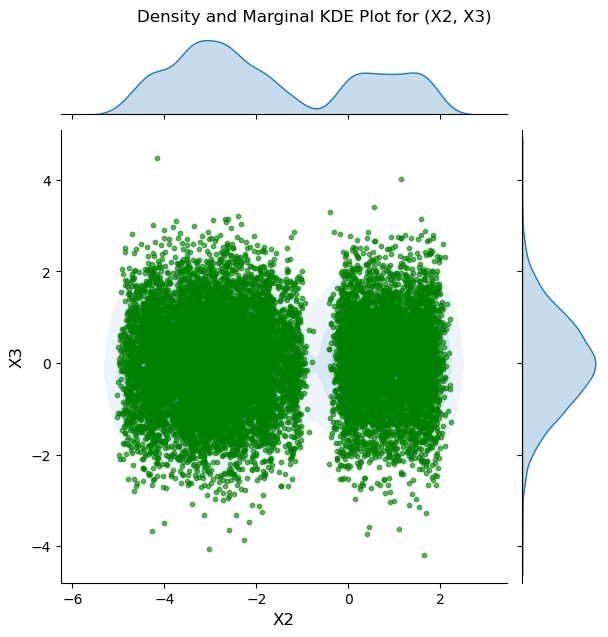

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt


dimension_pairs = [(0, 1), (0, 2), (1, 2)]

for dim_x, dim_y in dimension_pairs:
    g = sns.jointplot(
        x=X[:, dim_x].cpu().numpy(),
        y=X[:, dim_y].cpu().numpy(),
        kind="kde",
        fill=True,
        cmap="Blues"
    )

    g.plot_joint(plt.scatter, s=10, color='green', alpha=0.6)

    g.set_axis_labels(f'X{dim_x + 1}', f'X{dim_y + 1}', fontsize=12)
    plt.suptitle(f'Density and Marginal KDE Plot for (X{dim_x + 1}, X{dim_y + 1})', y=1.02)

    plt.show()


### Now, your job is to create a diffusion model which will approximate this data distribution.

### 2.1 Time-embedding and  UNet
In this section, you'll work on implementing a simplified UNet architecture with a time-embedding mechanism for processing the input data. The diffusion model uses a custom TimeEmbedding layer and a SmallUNet class to process data.
- **Time Embedding Layer:** Encodes temporal information for each input, enabling the model to consider the temporal context.

- **SmallUNet Architecture:** A simplified version of the UNet model, featuring encoder and decoder layers that transform the input data through downsampling and upsampling pathways.


**Implementing the TimeEmbedding Layer.**
The TimeEmbedding class encodes the time step (t) as a sinusoidal embedding, providing meaningful time representations. We implemented the TimeEmbedding for you.
- **Attributes:**
  - dim: Dimensionality of the time embedding vector.
- **Steps to Implement the Forward Pass:**
     - **Half Dim Calculation:** Divide dim by 2 to obtain the number of sinusoidal terms.
     - **Embedding Vector Creation:** Generate sinusoidal terms using exponential scaling on the range (0, half_dim).
     - **Combine Sin and Cos Terms:** Calculate sin and cos values for each term and concatenate them to form the embedding vector.


**Implementing the SmallUNet Architecture.**
The SmallUNet is designed to perform encoding and decoding on 5-dimensional input data with the following components:
- **Attributes:**
  - **input_dim:** Dimensionality of the input data (set to 5 in this case).
  - **emb_dim:** Dimensionality of the time embedding vector (set to 256 here).
- **Network Layers:**
   - **Encoder Layers (Downsampling):** Sequential linear layers that reduce dimensionality while incorporating time embedding information.
   - **Decoder Layers (Upsampling):** Upsampling layers with skip connections to the encoder layers, reconstructing the data.
   - **Normalization Layers:** Layer normalization applied to improve convergence and stability.
   - **Non-Linearity:** We use SILU non-linearity function as the end of encoder and decoder layers.

Here is overall the flow diagram of the forward pass through the network. Note $X$ is the input.
![Architecture](https://piazza.com/class_profile/get_resource/m0iur8tq7of4mw/m2soer7cjly13q)

### Question: Implementing Encoder Layers for `SmallUNet` (total: 30 points)

In this exercise, you’ll build the `SmallUNet` model by creating three linear layers. These layers transform the input data, including time embedding, to prepare it for decoding. Complete the instructions below to define the encoder layers.

---

#### 2.1.1: Define the Encoder Layers in `SmallUNet` (5 points)  

1. **Define `self.enc1` as a Linear Layer**:
   - The `self.enc1`, should take the concatenated input data and time embedding as input. Define the `linear layer` in `Encoder Layer 1` (see architecture) with the following dimensions.
   - **Input Dimension**: `input_dim + emb_dim` (where `input_dim = 5` and `emb_dim = 256`)
   - **Output Dimension**: `emb_dim`

2. **Define `self.enc2` as a Linear Layer**:
   - The `self.enc2`, will take the output from `enc1`. Define the `linear layer` in `Encoder Layer 2` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `emb_dim`

3. **Define `self.enc3` as a Linear Layer**:
   - The `self.enc3`, will process the output of `enc2`. Define the `linear layer` in `Encoder Layer 3` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `emb_dim`
   

#### 2.1.2: Define the Decoder Layers in `SmallUNet` (5 points)

1. **Define `self.dec1` as a Linear Layer**:
   - The `self.dec1`, will take the output from the encoding path along with a skip connection. Define the `linear layer` in `Decoder Layer 1` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim + emb_dim`
   - **Output Dimension**: `emb_dim`

2. **Define `self.dec2` as a Linear Layer**:
   - The `self.ec2`, will take the output from `dec1` along with another skip connection. Define the `linear layer` in `Decoder Layer 2` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim + emb_dim`
   - **Output Dimension**: `emb_dim`

3. **Define `self.out_layer` as the Final Output Layer**:
   - The final layer, `self.out_layer`, reduces the dimensionality to the original input dimension. Define the `linear layer` in `Output Layer` (see architecture) with the following dimensions.
   - **Input Dimension**: `emb_dim`
   - **Output Dimension**: `input_dim` (5-dimensional)


#### 2.1.3: Define the Normalization Layers in `SmallUNet` (5 points)

1. **Define `self.norm1` as a LayerNorm Layer**:
   - This layer normalizes the output of the first encoder layer. This is the `LayerNorm` in `Encoder Layer 1`(see architecture).
   - **Input Dimension**: `emb_dim`

2. **Define `self.norm2` as a LayerNorm Layer**:
   - This layer normalizes the output of the second encoder layer. This is the `LayerNorm` in `Encoder Layer 2`(see architecture).
   - **Input Dimension**: `emb_dim`

3. **Define `self.norm3` as a LayerNorm Layer**:
   - This layer normalizes the output of the third encoder layer. This is the `LayerNorm` in `Encoder Layer 3`(see architecture).
   - **Input Dimension**: `emb_dim`


#### 2.1.4: Define the Forward Pass in `SmallUNet` (15 points)

1. **Encoding Path with Layer Normalization (see architecture)**:
   - **Define `self.enc1` as a Linear Layer**:
      - The first encoder layer should take the concatenated input data and time embedding as input.
      - **Input Dimension**: `input_dim + emb_dim` (where `input_dim = 5` and `emb_dim = 256`)
      - **Output Dimension**: `emb_dim`

   - **Define `self.enc2` as a Linear Layer**:
      - The second encoder layer further refines the features produced by `enc1`.
      - **Input and Output Dimension**: `emb_dim`
   
   - **Define `self.enc3` as a Linear Layer**:
      - The third encoder layer applies an additional transformation for further feature refinement.
      - **Input and Output Dimension**: `emb_dim`

2. **Decoding Path** (see architecture):
    - **Define `d1` with Skip Connections**:
        - Concatenate the output from the last encoder layer (`h3`) with the output from the previous encoder layer (`h2`).
        - Pass this concatenated tensor through the first decoder layer `self.dec1` with **SiLU activation**.
  
    - **Define `d2` with Skip Connections**:
       - Concatenate the output from `d1` with the output from the first encoder layer (`h1`).
       - Pass this concatenated tensor through the second decoder layer `self.dec2` with **SiLU activation**.
   

In [5]:
class TimeEmbedding(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, t):
        half_dim = self.dim // 2
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -(math.log(10000) / half_dim)).to(t.device)
        emb = t[:, None] * emb[None, :]
        return torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)

class SmallUNet(nn.Module):
    def __init__(self, input_dim=5, emb_dim=256):
        super(SmallUNet, self).__init__()

        self.input_dim = input_dim
        self.emb_dim = emb_dim

        # Time embedding
        self.time_embedding = TimeEmbedding(emb_dim)

        # Encoder (Downsampling)
        self.enc1 = nn.Linear(input_dim + emb_dim, emb_dim)
        self.enc2 = nn.Linear(emb_dim, emb_dim)
        self.enc3 = nn.Linear(emb_dim, emb_dim)

        # Decoder (Upsampling)
        self.dec1 = nn.Linear(emb_dim + emb_dim, emb_dim)
        self.dec2 = nn.Linear(emb_dim + emb_dim, emb_dim)
        self.out_layer = nn.Linear(emb_dim, input_dim)

        # Normalization layers
        self.norm1 = nn.LayerNorm(emb_dim)
        self.norm2 = nn.LayerNorm(emb_dim)
        self.norm3 = nn.LayerNorm(emb_dim)

    def forward(self, x, t):
        # Embed the time
        t_emb = self.time_embedding(t)

        ############################################
        ################ YOUR CODE HERE ############
        ############################################

        x_t = torch.cat([x, t_emb], dim=-1) 

        # Encoding (Downsampling path with LayerNorm)
        h1 = self.norm1(self.enc1(x_t)) 
        h1 = F.silu(h1)

        h2 = self.norm2(self.enc2(h1))  
        h2 = F.silu(h2)

        h3 = self.norm3(self.enc3(h2))  
        h3 = F.silu(h3)

        # Decoding (Upsampling )
        d1 = torch.cat([h3, h2], dim=-1)  
        d1 = self.dec1(d1)  
        d1 = F.silu(d1)

        d2 = torch.cat([d1, h1], dim=-1)  
        d2 = self.dec2(d2) 
        d2 = F.silu(d2)

        # Final output
        out = self.out_layer(d2)
        return out


## 2.2: Implementing a Diffusion Model Class (total: 15 points)

In this task, you will implement key parts of the `Diffusion` class. This class simulates a diffusion process, where data points become progressively noisier over time steps. You’ll use functions in this class to add noise to an input, as well as sample clean data from the noisy input with the help of a neural network model. Follow the instructions below to complete the required components of the class.

---


### 2.2.1: Adding Noise to Data with `get_noisy_image`: (7.5 points)
   - Implement `get_noisy_image` to add noise to a clean data point `x_0` at a specified time step `t`.
     - **Parameters**:
       - `x_0`: Clean data point tensor (shape: `B x D`).
       - `t`: Timestep tensor (shape: `B x 1`).
     - **Noise Calculation**:
       - Compute `sqrt_alpha_hat` and `sqrt_one_minus_alpha_hat` for the specified timestep `t`.
       - Generate noise `eps` with the same shape as `x_0` using `torch.randn_like`.
       - Return the noisy image at time `t` using the formula:
         $$
x_t = \sqrt{\alpha_{\hat{t}}} \times x_0 + \sqrt{1 - \alpha_{\hat{t}}} \times \epsilon
$$

### 2.2.2:  Sampling Clean Data from Noise with `sample`: (7.5 points)
   - Implement `sample` to progressively denoise a noisy image and retrieve clean samples.
     - **Parameters**:
       - `model`: Model that predicts noise at each timestep.
       - `n`: Number of samples.
       - `dim`: Dimensionality of the samples.
     - **Sampling Loop**:
       - Initialize a random noise tensor `x` of shape `(n, dim)`.
       - Loop through each timestep in reverse, denoising at each step:
         - Use the model to predict noise.
         - Update `x` using the denoising formula, incorporating terms for `alpha`, `alpha_hat`, `beta`, and any additional noise if `i > 1`.
     - Return the final denoised samples.

---

In [ ]:
import torch

class Diffusion:
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        # Linear beta schedule from beta_start to beta_end
        self.beta = torch.linspace(self.beta_start, self.beta_end, self.num_timesteps).to(self.device)
        self.alpha = 1. - self.beta
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)

    def get_noisy_image(self, x_0, t):
        '''
        forward pass of diffusion
        x_0: Clean data point (B x D)
        t: Timestep (B x 1)
        Returns: Noisy image (x_t) at timestep t
        '''

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        # Extract the current timestep value
        t = t.long()  # ensure the timestep is an integer

        # Compute sqrt(alpha_hat) and sqrt(1 - alpha_hat) at timestep t
        sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t]).unsqueeze(-1)  # shape (B, 1)
        sqrt_one_minus_alpha_hat = torch.sqrt(1. - self.alpha_hat[t]).unsqueeze(-1)  # shape (B, 1)

        # Generate random noise (same shape as x_0)
        eps = torch.randn_like(x_0).to(self.device)  # shape (B, D)

        # Apply the diffusion equation
        x_t = sqrt_alpha_hat * x_0 + sqrt_one_minus_alpha_hat * eps

        return x_t



    def sample(self, model, n, dim, device='cuda'):
            '''
            backward pass of diffusion
            n: Number of samples
            dim: Dimensionality of the samples
            '''
            model.eval()
            with torch.no_grad():
                # Start from random noise (n, dim)
                x = torch.randn((n, dim)).to(self.device)  
                
                for i in reversed(range(self.num_timesteps)):
                    t = torch.full((n,), i, dtype=torch.long, device=self.device)  # Timestep for this step

                    # Predict the noise using the model
                    epsilon_t = model(x, t)  # Model should predict epsilon_t

                    # Debugging: print shapes of x and epsilon_t
                    print(f"Iteration {i}: x shape = {x.shape}, epsilon_t shape = {epsilon_t.shape}")

                    # Ensure epsilon_t has the correct shape (n, dim)
                    # if epsilon_t.dim() == 1:  # If epsilon_t is (n,), reshape to (n, dim)
                    #     epsilon_t = epsilon_t.unsqueeze(-1).expand(-1, dim)

                    # Get alpha_hat and beta values
                    alpha_hat_t = self.alpha_hat[t]
                    beta_t = self.beta[t]

                    # Calculate the next timestep x_{t-1}
                    if i > 0:
                        # Denoising step for the reverse process
                        x = (x - torch.sqrt(1 - alpha_hat_t).unsqueeze(-1) * epsilon_t) / torch.sqrt(alpha_hat_t).unsqueeze(-1)
                    else:
                        # At the final step (t = 0), no more noise is added
                        x = (x - torch.sqrt(1 - alpha_hat_t).unsqueeze(-1) * epsilon_t) / torch.sqrt(alpha_hat_t).unsqueeze(-1)

            return x



## Question: Implementing the Training Loop for a Diffusion Model (total: 15 points)

In this task, you’ll implement the training loop for a diffusion model, using a neural network to predict noise added to data at various timesteps. This will help the model learn to denoise data over time. Follow the steps below to set up and execute the training process.

---

### 2.3.1: Set Up the Model and Training Configuration: (1 points)
   - **Device Selection**: Define `device` as `'cuda'` (if a GPU is available) or `'cpu'`.
   - **Model and Optimizer**:
     - Initialize the `SmallUNet` model with an `input_dim` of 5 (for 5D data) and move it to the selected device.
     - Define the optimizer using `Adam` with a learning rate of `1e-4`.
     - Use mean squared error (MSE) as the loss function.

### 2.3.2: Initialize the Diffusion Process: (2 points)
   - Create an instance of the `Diffusion` class with `num_timesteps=1000` and move it to the selected device.

### 2.3.3: Define Training Loop Configuration: (2 points)
   - Set `n_epochs` to 500 and `batch_size` to 64.
   - Calculate the number of samples (`n_samples`) from `X.shape[0]`.
   - Create an empty list `epoch_losses` to store the average loss at the end of each epoch.

### 2.3.4: Implement the Training Loop: (10 points)
   - **Batch Loop**:
     - For each batch:
       - Use `get_noisy_image` to obtain the noisy image and the noise added.
       - Pass the noisy image and timestep `t` to the model to predict the noise.
       - Calculate the MSE loss between the predicted noise and actual noise.
     - **Backpropagation and Optimization**:
       - Perform backpropagation with `loss.backward()`.
       - Apply gradient clipping with `torch.nn.utils.clip_grad_norm_` to avoid exploding gradients.
       - Update model parameters with `optimizer.step()`.
   - Calculate and store the average loss for each epoch in `epoch_losses`, then print it.


In [7]:
# Setup for training
############################################
################ YOUR CODE HERE ############
############################################
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SmallUNet(input_dim=5, emb_dim=256).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

# Initialize the diffusion process
diffusion = Diffusion(num_timesteps=1000, device=device)

# Training loop
n_epochs = 500
batch_size = 64
n_samples = X.shape[0]

# List to store the loss at the end of each epoch
epoch_losses = []

for epoch in range(n_epochs):
    epoch_loss = 0
    print(f'Epoch {epoch + 1}/{n_epochs}')
    for i in tqdm(range(0, n_samples, batch_size)):
        # Get batch
        batch = X[i:i+batch_size].to(device)

        # Sample random timesteps
        t = torch.randint(1, diffusion.num_timesteps, (batch.size(0),)).to(device)

        ############################################
        ################ YOUR CODE HERE ############
        ############################################
        noisy_images = diffusion.get_noisy_image(batch, t)
        noise = (noisy_images - torch.sqrt(diffusion.alpha_hat[t].unsqueeze(-1)) * batch) / torch.sqrt(1 - diffusion.alpha_hat[t].unsqueeze(-1))

        # Pass noisy images and timesteps through the model to predict the noise
        predicted_noise = model(noisy_images, t)

        # Calculate the MSE loss between the predicted noise and actual noise
        loss = criterion(predicted_noise, noise)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping to avoid NaNs
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        

        # Gradient clipping to avoid NaNs


        optimizer.step()

    # Calculate average loss for the epoch and store it
    epoch_loss /= (n_samples // batch_size)
    epoch_losses.append(epoch_loss)

    print(f'Epoch {epoch + 1} Loss: {epoch_loss}')




Epoch 1/500


100%|██████████| 235/235 [00:02<00:00, 94.52it/s] 


Epoch 1 Loss: 0.0
Epoch 2/500


100%|██████████| 235/235 [00:02<00:00, 110.07it/s]


Epoch 2 Loss: 0.0
Epoch 3/500


100%|██████████| 235/235 [00:02<00:00, 112.41it/s]


Epoch 3 Loss: 0.0
Epoch 4/500


100%|██████████| 235/235 [00:02<00:00, 113.53it/s]


Epoch 4 Loss: 0.0
Epoch 5/500


100%|██████████| 235/235 [00:01<00:00, 117.51it/s]


Epoch 5 Loss: 0.0
Epoch 6/500


100%|██████████| 235/235 [00:02<00:00, 117.35it/s]


Epoch 6 Loss: 0.0
Epoch 7/500


100%|██████████| 235/235 [00:02<00:00, 114.62it/s]


Epoch 7 Loss: 0.0
Epoch 8/500


100%|██████████| 235/235 [00:02<00:00, 112.42it/s]


Epoch 8 Loss: 0.0
Epoch 9/500


100%|██████████| 235/235 [00:02<00:00, 113.26it/s]


Epoch 9 Loss: 0.0
Epoch 10/500


100%|██████████| 235/235 [00:02<00:00, 107.75it/s]


Epoch 10 Loss: 0.0
Epoch 11/500


100%|██████████| 235/235 [00:02<00:00, 107.80it/s]


Epoch 11 Loss: 0.0
Epoch 12/500


100%|██████████| 235/235 [00:02<00:00, 111.92it/s]


Epoch 12 Loss: 0.0
Epoch 13/500


100%|██████████| 235/235 [00:02<00:00, 108.30it/s]


Epoch 13 Loss: 0.0
Epoch 14/500


100%|██████████| 235/235 [00:02<00:00, 109.61it/s]


Epoch 14 Loss: 0.0
Epoch 15/500


100%|██████████| 235/235 [00:02<00:00, 103.96it/s]


Epoch 15 Loss: 0.0
Epoch 16/500


100%|██████████| 235/235 [00:02<00:00, 92.81it/s]


Epoch 16 Loss: 0.0
Epoch 17/500


100%|██████████| 235/235 [00:02<00:00, 106.66it/s]


Epoch 17 Loss: 0.0
Epoch 18/500


100%|██████████| 235/235 [00:02<00:00, 99.41it/s] 


Epoch 18 Loss: 0.0
Epoch 19/500


100%|██████████| 235/235 [00:02<00:00, 102.85it/s]


Epoch 19 Loss: 0.0
Epoch 20/500


100%|██████████| 235/235 [00:02<00:00, 105.07it/s]


Epoch 20 Loss: 0.0
Epoch 21/500


100%|██████████| 235/235 [00:02<00:00, 103.88it/s]


Epoch 21 Loss: 0.0
Epoch 22/500


100%|██████████| 235/235 [00:02<00:00, 112.07it/s]


Epoch 22 Loss: 0.0
Epoch 23/500


100%|██████████| 235/235 [00:02<00:00, 113.49it/s]


Epoch 23 Loss: 0.0
Epoch 24/500


100%|██████████| 235/235 [00:02<00:00, 107.29it/s]


Epoch 24 Loss: 0.0
Epoch 25/500


100%|██████████| 235/235 [00:02<00:00, 102.16it/s]


Epoch 25 Loss: 0.0
Epoch 26/500


100%|██████████| 235/235 [00:02<00:00, 111.62it/s]


Epoch 26 Loss: 0.0
Epoch 27/500


100%|██████████| 235/235 [00:02<00:00, 110.35it/s]


Epoch 27 Loss: 0.0
Epoch 28/500


100%|██████████| 235/235 [00:02<00:00, 100.64it/s]


Epoch 28 Loss: 0.0
Epoch 29/500


100%|██████████| 235/235 [00:02<00:00, 102.41it/s]


Epoch 29 Loss: 0.0
Epoch 30/500


100%|██████████| 235/235 [00:02<00:00, 93.43it/s]


Epoch 30 Loss: 0.0
Epoch 31/500


100%|██████████| 235/235 [00:02<00:00, 93.40it/s]


Epoch 31 Loss: 0.0
Epoch 32/500


100%|██████████| 235/235 [00:02<00:00, 95.38it/s] 


Epoch 32 Loss: 0.0
Epoch 33/500


100%|██████████| 235/235 [00:02<00:00, 103.48it/s]


Epoch 33 Loss: 0.0
Epoch 34/500


100%|██████████| 235/235 [00:02<00:00, 103.70it/s]


Epoch 34 Loss: 0.0
Epoch 35/500


100%|██████████| 235/235 [00:02<00:00, 105.31it/s]


Epoch 35 Loss: 0.0
Epoch 36/500


100%|██████████| 235/235 [00:02<00:00, 105.19it/s]


Epoch 36 Loss: 0.0
Epoch 37/500


100%|██████████| 235/235 [00:02<00:00, 101.90it/s]


Epoch 37 Loss: 0.0
Epoch 38/500


100%|██████████| 235/235 [00:02<00:00, 102.67it/s]


Epoch 38 Loss: 0.0
Epoch 39/500


100%|██████████| 235/235 [00:02<00:00, 111.08it/s]


Epoch 39 Loss: 0.0
Epoch 40/500


100%|██████████| 235/235 [00:03<00:00, 77.20it/s] 


Epoch 40 Loss: 0.0
Epoch 41/500


100%|██████████| 235/235 [00:02<00:00, 105.88it/s]


Epoch 41 Loss: 0.0
Epoch 42/500


100%|██████████| 235/235 [00:02<00:00, 113.99it/s]


Epoch 42 Loss: 0.0
Epoch 43/500


100%|██████████| 235/235 [00:03<00:00, 72.43it/s] 


Epoch 43 Loss: 0.0
Epoch 44/500


100%|██████████| 235/235 [00:02<00:00, 95.17it/s]


Epoch 44 Loss: 0.0
Epoch 45/500


100%|██████████| 235/235 [00:02<00:00, 83.98it/s] 


Epoch 45 Loss: 0.0
Epoch 46/500


100%|██████████| 235/235 [00:02<00:00, 81.85it/s] 


Epoch 46 Loss: 0.0
Epoch 47/500


100%|██████████| 235/235 [00:02<00:00, 79.59it/s] 


Epoch 47 Loss: 0.0
Epoch 48/500


100%|██████████| 235/235 [00:02<00:00, 80.94it/s]


Epoch 48 Loss: 0.0
Epoch 49/500


100%|██████████| 235/235 [00:02<00:00, 91.73it/s]


Epoch 49 Loss: 0.0
Epoch 50/500


100%|██████████| 235/235 [00:01<00:00, 148.16it/s]


Epoch 50 Loss: 0.0
Epoch 51/500


100%|██████████| 235/235 [00:01<00:00, 143.71it/s]


Epoch 51 Loss: 0.0
Epoch 52/500


100%|██████████| 235/235 [00:01<00:00, 121.94it/s]


Epoch 52 Loss: 0.0
Epoch 53/500


100%|██████████| 235/235 [00:01<00:00, 124.11it/s]


Epoch 53 Loss: 0.0
Epoch 54/500


100%|██████████| 235/235 [00:01<00:00, 144.33it/s]


Epoch 54 Loss: 0.0
Epoch 55/500


100%|██████████| 235/235 [00:01<00:00, 167.30it/s]


Epoch 55 Loss: 0.0
Epoch 56/500


100%|██████████| 235/235 [00:01<00:00, 164.92it/s]


Epoch 56 Loss: 0.0
Epoch 57/500


100%|██████████| 235/235 [00:02<00:00, 117.19it/s]


Epoch 57 Loss: 0.0
Epoch 58/500


100%|██████████| 235/235 [00:02<00:00, 109.03it/s]


Epoch 58 Loss: 0.0
Epoch 59/500


100%|██████████| 235/235 [00:02<00:00, 112.81it/s]


Epoch 59 Loss: 0.0
Epoch 60/500


100%|██████████| 235/235 [00:03<00:00, 70.95it/s]


Epoch 60 Loss: 0.0
Epoch 61/500


100%|██████████| 235/235 [00:02<00:00, 108.33it/s]


Epoch 61 Loss: 0.0
Epoch 62/500


100%|██████████| 235/235 [00:02<00:00, 89.90it/s] 


Epoch 62 Loss: 0.0
Epoch 63/500


100%|██████████| 235/235 [00:02<00:00, 111.96it/s]


Epoch 63 Loss: 0.0
Epoch 64/500


100%|██████████| 235/235 [00:02<00:00, 109.17it/s]


Epoch 64 Loss: 0.0
Epoch 65/500


100%|██████████| 235/235 [00:02<00:00, 93.85it/s] 


Epoch 65 Loss: 0.0
Epoch 66/500


100%|██████████| 235/235 [00:02<00:00, 101.28it/s]


Epoch 66 Loss: 0.0
Epoch 67/500


100%|██████████| 235/235 [00:02<00:00, 86.54it/s] 


Epoch 67 Loss: 0.0
Epoch 68/500


100%|██████████| 235/235 [00:02<00:00, 107.83it/s]


Epoch 68 Loss: 0.0
Epoch 69/500


100%|██████████| 235/235 [00:02<00:00, 108.25it/s]


Epoch 69 Loss: 0.0
Epoch 70/500


100%|██████████| 235/235 [00:02<00:00, 95.82it/s] 


Epoch 70 Loss: 0.0
Epoch 71/500


100%|██████████| 235/235 [00:02<00:00, 87.56it/s] 


Epoch 71 Loss: 0.0
Epoch 72/500


100%|██████████| 235/235 [00:02<00:00, 105.42it/s]


Epoch 72 Loss: 0.0
Epoch 73/500


100%|██████████| 235/235 [00:02<00:00, 86.10it/s] 


Epoch 73 Loss: 0.0
Epoch 74/500


100%|██████████| 235/235 [00:02<00:00, 102.55it/s]


Epoch 74 Loss: 0.0
Epoch 75/500


100%|██████████| 235/235 [00:02<00:00, 103.62it/s]


Epoch 75 Loss: 0.0
Epoch 76/500


100%|██████████| 235/235 [00:04<00:00, 53.87it/s]


Epoch 76 Loss: 0.0
Epoch 77/500


100%|██████████| 235/235 [00:02<00:00, 102.76it/s]


Epoch 77 Loss: 0.0
Epoch 78/500


100%|██████████| 235/235 [00:02<00:00, 105.22it/s]


Epoch 78 Loss: 0.0
Epoch 79/500


100%|██████████| 235/235 [00:02<00:00, 102.13it/s]


Epoch 79 Loss: 0.0
Epoch 80/500


100%|██████████| 235/235 [00:02<00:00, 102.19it/s]


Epoch 80 Loss: 0.0
Epoch 81/500


100%|██████████| 235/235 [00:02<00:00, 110.21it/s]


Epoch 81 Loss: 0.0
Epoch 82/500


100%|██████████| 235/235 [00:02<00:00, 104.67it/s]


Epoch 82 Loss: 0.0
Epoch 83/500


100%|██████████| 235/235 [00:02<00:00, 97.62it/s] 


Epoch 83 Loss: 0.0
Epoch 84/500


100%|██████████| 235/235 [00:02<00:00, 102.62it/s]


Epoch 84 Loss: 0.0
Epoch 85/500


100%|██████████| 235/235 [00:02<00:00, 104.86it/s]


Epoch 85 Loss: 0.0
Epoch 86/500


100%|██████████| 235/235 [00:02<00:00, 105.73it/s]


Epoch 86 Loss: 0.0
Epoch 87/500


100%|██████████| 235/235 [00:02<00:00, 106.14it/s]


Epoch 87 Loss: 0.0
Epoch 88/500


100%|██████████| 235/235 [00:02<00:00, 106.02it/s]


Epoch 88 Loss: 0.0
Epoch 89/500


100%|██████████| 235/235 [00:02<00:00, 105.45it/s]


Epoch 89 Loss: 0.0
Epoch 90/500


100%|██████████| 235/235 [00:02<00:00, 104.99it/s]


Epoch 90 Loss: 0.0
Epoch 91/500


100%|██████████| 235/235 [00:02<00:00, 107.05it/s]


Epoch 91 Loss: 0.0
Epoch 92/500


100%|██████████| 235/235 [00:02<00:00, 111.89it/s]


Epoch 92 Loss: 0.0
Epoch 93/500


100%|██████████| 235/235 [00:02<00:00, 109.87it/s]


Epoch 93 Loss: 0.0
Epoch 94/500


100%|██████████| 235/235 [00:02<00:00, 108.91it/s]


Epoch 94 Loss: 0.0
Epoch 95/500


100%|██████████| 235/235 [00:02<00:00, 99.74it/s] 


Epoch 95 Loss: 0.0
Epoch 96/500


100%|██████████| 235/235 [00:02<00:00, 105.30it/s]


Epoch 96 Loss: 0.0
Epoch 97/500


100%|██████████| 235/235 [00:02<00:00, 99.94it/s] 


Epoch 97 Loss: 0.0
Epoch 98/500


100%|██████████| 235/235 [00:02<00:00, 99.92it/s] 


Epoch 98 Loss: 0.0
Epoch 99/500


100%|██████████| 235/235 [00:02<00:00, 98.72it/s] 


Epoch 99 Loss: 0.0
Epoch 100/500


100%|██████████| 235/235 [00:02<00:00, 107.42it/s]


Epoch 100 Loss: 0.0
Epoch 101/500


100%|██████████| 235/235 [00:02<00:00, 110.86it/s]


Epoch 101 Loss: 0.0
Epoch 102/500


100%|██████████| 235/235 [00:02<00:00, 107.28it/s]


Epoch 102 Loss: 0.0
Epoch 103/500


100%|██████████| 235/235 [00:02<00:00, 109.85it/s]


Epoch 103 Loss: 0.0
Epoch 104/500


100%|██████████| 235/235 [00:02<00:00, 105.45it/s]


Epoch 104 Loss: 0.0
Epoch 105/500


100%|██████████| 235/235 [00:02<00:00, 106.09it/s]


Epoch 105 Loss: 0.0
Epoch 106/500


100%|██████████| 235/235 [00:02<00:00, 105.88it/s]


Epoch 106 Loss: 0.0
Epoch 107/500


100%|██████████| 235/235 [00:02<00:00, 108.34it/s]


Epoch 107 Loss: 0.0
Epoch 108/500


100%|██████████| 235/235 [00:02<00:00, 111.41it/s]


Epoch 108 Loss: 0.0
Epoch 109/500


100%|██████████| 235/235 [00:02<00:00, 109.68it/s]


Epoch 109 Loss: 0.0
Epoch 110/500


100%|██████████| 235/235 [00:02<00:00, 105.85it/s]


Epoch 110 Loss: 0.0
Epoch 111/500


100%|██████████| 235/235 [00:02<00:00, 97.43it/s] 


Epoch 111 Loss: 0.0
Epoch 112/500


100%|██████████| 235/235 [00:02<00:00, 96.15it/s]


Epoch 112 Loss: 0.0
Epoch 113/500


100%|██████████| 235/235 [00:02<00:00, 108.09it/s]


Epoch 113 Loss: 0.0
Epoch 114/500


100%|██████████| 235/235 [00:01<00:00, 145.20it/s]


Epoch 114 Loss: 0.0
Epoch 115/500


100%|██████████| 235/235 [00:01<00:00, 152.79it/s]


Epoch 115 Loss: 0.0
Epoch 116/500


100%|██████████| 235/235 [00:01<00:00, 146.99it/s]


Epoch 116 Loss: 0.0
Epoch 117/500


100%|██████████| 235/235 [00:01<00:00, 156.26it/s]


Epoch 117 Loss: 0.0
Epoch 118/500


100%|██████████| 235/235 [00:01<00:00, 161.50it/s]


Epoch 118 Loss: 0.0
Epoch 119/500


 80%|███████▉  | 187/235 [00:01<00:00, 155.20it/s]


KeyboardInterrupt: 

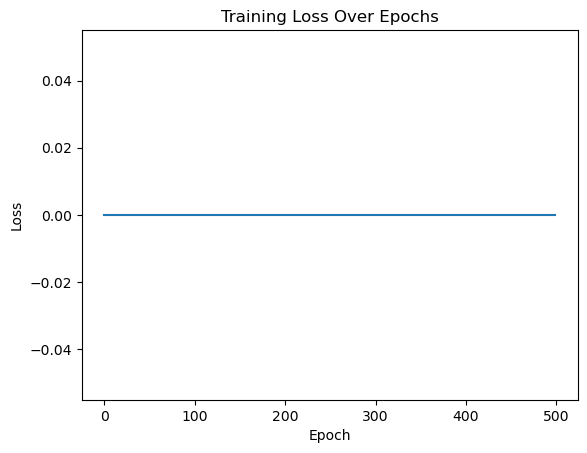

In [ ]:
# Plot loss curve
plt.plot(epoch_losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## Sample from diffusion model and compare with the training data

We will use the sample() method of Diffusion class to sample the points of estimated distribution of diffusion and comapre with the original training distribution. You will see three clusters in the region of training data.

In [ ]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def batch_sample(diffusion, model, total_samples, batch_size, dim, device='cuda'):
    all_samples = []
    model.eval()
    num_batches = total_samples // batch_size

    with torch.no_grad():
        for _ in tqdm(range(num_batches), desc="Sampling in batches"):
            batch_samples = diffusion.sample(model, n=batch_size, dim=dim, device=device)
            all_samples.append(batch_samples.cpu())
    return torch.cat(all_samples, dim=0).numpy()


n_samples_to_generate = 1000
batch_size = 10
dim = 5

# Generate samples in batches
sampled_data = batch_sample(diffusion, model, n_samples_to_generate, batch_size, dim, device=device)

# Plotting the original data and the sampled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), label='Original Data', alpha=0.6, color='green')
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], label='Sampled Data', alpha=0.6, color='blue')


plt.title('Original Data vs Sampled Data (Batch Sampling with Progress)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


Sampling in batches:   0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (10) must match the size of tensor b (5) at non-singleton dimension 1

## Load held-out test data

In [ ]:
X = torch.load("test_synthetic-5D.pth")
gt_labels = np.load("test_labels.npy")
print(X.shape)
print(gt_labels.shape)

## Sample from diffusion model and compare with the test data

We will use the sample() method of Diffusion class to sample the points of estimated distribution of diffusion and comapre with the test distribution. You will see three clusters in the region of test data.

In [ ]:
def batch_sample(diffusion, model, total_samples, batch_size, dim, device='cuda'):
    all_samples = []
    model.eval()
    num_batches = total_samples // batch_size

    with torch.no_grad():
        for _ in tqdm(range(num_batches), desc="Sampling in batches"):
            batch_samples = diffusion.sample(model, n=batch_size, dim=dim, device=device)
            all_samples.append(batch_samples.cpu())
    return torch.cat(all_samples, dim=0).numpy()


n_samples_to_generate = 1000
batch_size = 10
dim = 5

# Generate samples in batches
sampled_data = batch_sample(diffusion, model, n_samples_to_generate, batch_size, dim, device=device)

# Plotting the original data and the sampled data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.6, color='green')
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], label='Sampled Data', alpha=0.6, color='blue')


plt.title('Original Data vs Sampled Data (Batch Sampling with Progress)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


## Evaluation metric:

Again sample generated data from the sample() method of Diffusion and use the following metric for evaluation:

**MSE:** Measures the squared differences between each generated sample and its closest match in the hold-out data, giving an overall measure of similarity. You will get between 4.0-4.5

**Cosine Similarity:** Calculates similarity between the vectors of generated and hold-out data, useful for understanding how directionally similar the distributions are in the vector space. You will get between 0.4-0.6

**Average Pairwise Distance:** Computes Euclidean distances between each generated sample and its closest match in the hold-out dataset, offering insight into the spatial distribution similarity. You will get between 0.4-0.6

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, pairwise_distances
from sklearn.metrics import pairwise_distances_argmin_min

def generate_samples(model, diffusion, n_samples, dim, device='cuda'):
    model.eval()
    with torch.no_grad():
        generated_samples = diffusion.sample(model, n=n_samples, dim=dim, device=device)
    return generated_samples.cpu().numpy()

hold_out_data = X


n_test_samples = hold_out_data.shape[0]
generated_data = generate_samples(model, diffusion, n_samples=n_test_samples, dim=5, device=device)


mse_score = mean_squared_error(hold_out_data, generated_data)
print(f'Mean Squared Error (MSE) between hold-out data and generated data: {mse_score:.4f}')


cosine_similarity_score = np.mean(1 - pairwise_distances(hold_out_data, generated_data, metric="cosine"))
print(f'Cosine Similarity (average) between hold-out data and generated data: {cosine_similarity_score:.4f}')

_, distances = pairwise_distances_argmin_min(generated_data, hold_out_data)
avg_distance = np.mean(distances)
print(f'Average Pairwise Euclidean Distance between generated and hold-out data: {avg_distance:.4f}')


## Problem 3 Conditional Face Generation Using Diffusion (30 points)
------------------------
In this problem, you will code a diffusion model for conditional face generation.
The goal is to train the model to generate random faces conditioned upon gender.
We use the CelebA dataset, which contains around 200K images of celebrity faces.
The faces are labeled with 40 binary attributes. We will only use the gender attribute for this problem.

Most of the code is already written. You only need to fill in the parts that say "YOUR CODE HERE".

#### References

[1] First modern diffusion paper: https://arxiv.org/abs/2006.11239 (Jonathan Ho et al. Neurips 2020)

[2] Phil Wang's Pytorch implementation: https://github.com/lucidrains/denoising-diffusion-pytorch

You are strongly encouraged to write your own code instead of copy and pasting from existing implementations.

Set the "dataroot" variable to the directory containing all the images

In [ ]:
dataroot = "/projectnb/ec523kb/materials/celebA/img_align_celeba/" #  on SCC

In [ ]:
# check GPU status
! nvidia-smi

In [ ]:
from __future__ import print_function
import os, math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision
from PIL import Image
from copy import deepcopy

# The CelebA dataset contains 40 binary attribute labels for each image
attributes = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
 'Big_Lips', 'Big_Nose', 'Black_Hair',
 'Blond_Hair', 'Blurry', 'Brown_Hair',
 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup',
 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face',
 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat',
 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
 'Young']

def set_random_seed(seed=999):
    # Set random seed for reproducibility
    print("Random Seed: ", seed)
    random.seed(seed)
    torch.manual_seed(seed)

This class handles reading the data from disk.

In [ ]:
class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, transform = None):
        '''Initialize the dataset.'''
        self.transform = transform
        self.root = dataroot
        self.attr_txt = dataroot + 'list_attr_celeba.txt'
        self._parse()

    def _parse(self):
        '''
        Parse the celeba text file.
        Pupulate the following private variables:
         - self.ys: A list of 1D tensors with 40 binary attribute labels.
         - self.im_paths: A list of strings (image paths).
        '''
        self.im_paths = [] # list of jpeg filenames
        self.ys = []       # list of attribute labels

        def _to_binary(lst):
            return torch.tensor([0 if lab == '-1' else 1 for lab in lst])

        with open(self.attr_txt) as f:
            for line in f:
                assert len(line.strip().split()) == 41
                fl = line.strip().split()
                if fl[0][-4:] == '.jpg': # if not header
                    self.im_paths.append(self.root + fl[0]) # jpeg filename
                    self.ys.append(_to_binary(fl[1:]))      # 1D tensor of 40 binary attributes

    def __len__(self):
        '''Return length of the dataset.'''
        return len(self.ys)

    def __getitem__(self, index):
        '''
        Return the (image, attributes) tuple.
        This function gets called when you index the dataset.
        '''
        def img_load(index):
            imraw = Image.open(self.im_paths[index])
            im = self.transform(imraw)
            return im

        target = self.ys[index]
        return img_load(index), target

The next few code blocks implement the **denoising autoencoder**. At each timestep, the autoencoder **predicts the noise component of the noisy image.** In problem 1, we called this function $\epsilon_{\theta}(x_t, t)$. It takes an image $x_t$ and an integer $t$ as input and outputs an image.

For this problem, we will also add a binary input corresponding to the gender of the face. Let's call this binary label $y$, so the denoising autoencoder $\epsilon_{\theta}(x_t, t, y)$ takes three inputs in this problem.

$\epsilon_{\theta}$ is implemented as a UNet (reference https://arxiv.org/abs/1505.04597 Figure 1). The UNet was originally developed for image segmentation, but is useful for any image-to-image translation task. The UNet is built from downsampling and upsampling modules (implemented as "Up" and "Down" classes below). These modules are built from a fairly standard convolutional block, implemented as class "Block" below. This type of convolutional block is commonly used in vision models (such as ResNets and Stable Diffusion). Recently, most state-of-the-art vision models add in attention layers. We won't use attention here because they are slow and not necessary for this assignment.

The vanilla UNet is unconditional, so **you need to make some modifications to inject the time and gender conditionings $t$ and $y$.** The time conditioning is implemented using the standard sinusoidal positional embedding from the well-kown transformer paper (https://arxiv.org/pdf/1706.03762.pdf). The gender conditioning is implemented using two learnable embedding vectors (one for female faces, and one for male faces).

## Problem 3.1 Conditional UNet (10 Points)
-------------------
In this part, we implement the conditional UNet. Most of the code is written. Please fill in the parts that are missing according to the descriptions.

In [ ]:
def nonlinearity(x):
    ''' Also called the activation function. '''
    # swish
    return x*torch.sigmoid(x)
    # Swish is similar to GeLU. People tend to use this more than ReLU nowadays.

class Block(nn.Module):
    '''
    This implements a residual block.
    It has a similar structure to the residual block used in ResNets,
    but there are a few modern modifications:
     - Different order of applying weights, activations, and normalization.
     - Swish instead of ReLU activation.
     - GroupNorm instead of BatchNorm.
    We also need to add the conditional embedding.

    '''
    def __init__(self, in_channels, out_channels, emb_dim=256):
        '''
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.norm1 = nn.GroupNorm(1, in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)

        ################## YOUR CODE HERE ##################
        # Instantiate a linear layer.
        # The layer should have input dimension emb_dim and
        # output dimension out_channels.
        # Store the linear layer in a variable called self.proj
        ####################################################

    def forward(self, x, t):
        '''
        h and x have dimension B x C x H x W,
        where B is batch size,
              C is channel size,
              H is height,
              W is width.
        t is the conditional embedding.
        t has dimension B x V,
        where V is the embedding dimension.
        '''
        h = x
        h = self.norm1(h)
        h = nonlinearity(h)
        h = self.conv1(h)

        ################## YOUR CODE HERE ##################
        # Add conditioning to the hidden feature map h here
        # by adding a linear projection of the conditional embedding t.
        # (1) Start with t, which has dimension B x V,
        #    where B is batch size and V is embedding size.
        # (2) Pass t through the linear layer self.proj
        #    The resulting variable has dimenion B x C,
        #    where C is the number of image channels in h.
        # (3) Pass the result through the swish nonlinearity.
        # (4) Add the result to h.
        #    keep in mind that h has dimension B x C x H x W,
        #    where H  and W are the height and width of the feature map.
        #    The conditioning should be constant across the H and W dimensions.
        ####################################################

        # Add conditioning to the hidden feature map h
        # (1) Linear projection of the conditional embedding t

        # (3) Reshape for broadcasting across H and W dimensions
        # t_proj is reshaped to B x C x 1 x 1 so that it can be broadcasted

        # (3) Add the conditioning to h

        return

The "Up" and "Down" classes implement the upsampling and downsampling blocks. These are given to you.

In [ ]:
class Down(nn.Module):
    ''' Downsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block downsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, t):
        ''' x is the feature maps; t is the conditional embeddings. '''
        x = self.pool(x) # The max pooling decreases feature map size by factor of 2
        x = self.conv(x, t)
        return x

class Up(nn.Module):
    ''' Upsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block upsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, skip_x, t):
        '''
        x is the feature maps;
        skip_x is the skipp connection feature maps;
        t is the conditional embeddings.
        '''
        x = self.up(x) # The upsampling increases the feature map size by factor of 2
        x = torch.cat([skip_x, x], dim=1) # concatentate skip connection
        x = self.conv(x, t)
        return x

The UNet class implements a conditional UNet. This is done for you.

In [ ]:
class UNet(nn.Module):
    ''' UNet implementation of a denoising auto-encoder.'''
    def __init__(self, c_in=3, c_out=3, conditional=True, emb_dim=256):
        '''
        c_in: Number of image channels in input.
        c_out: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()
        self.emb_dim = emb_dim
        self.inc = Block(c_in, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 256)

        self.bot1 = Block(256, 512)
        self.bot2 = Block(512, 512)
        self.bot3 = Block(512, 512)
        self.bot4 = Block(512, 256)

        self.up1 = Up(512, 128)
        self.up2 = Up(256, 64)
        self.up3 = Up(128, 64)
        self.outc = nn.Conv2d(64, c_out, kernel_size=1)

        # nn.Embedding implements a dictionary of num_classes prototypes
        self.conditional = conditional
        if conditional:
            num_classes = 2

            self.gender_vectors = nn.Parameter(torch.randn(num_classes, emb_dim))



    def temporal_encoding(self, timestep):
        '''
        This implements the sinusoidal temporal encoding for the current timestep.
        Input timestep is a tensor of length equal to the batch size
        Output emb is a 2D tensor B x V,
            where V is the embedding dimension.
        '''
        assert len(timestep.shape) == 1
        half_dim = self.emb_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
        emb = emb.to(device=timestep.device)
        emb = timestep.float()[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
        if self.emb_dim % 2 == 1:  # zero pad
            emb = torch.nn.functional.pad(emb, (0,1,0,0))
        return emb

    def unet_forward(self, x, t):
        # x: B x 3 x 224 x 224
        x1 = self.inc(x, t)    # x1: B x 64 x 64 x 64
        x2 = self.down1(x1, t) # x2: B x 128 x 32 x 32
        x3 = self.down2(x2, t) # x3: B x 256 x 16 x 16
        x4 = self.down3(x3, t) # x3: B x 256 x 8 x 8

        x4 = self.bot1(x4, t) # x4: B x 512 x 8 x 8
        # Removing bot2 and bot3 can save some time at the expense of quality
        x4 = self.bot2(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot3(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot4(x4, t) # x4: B x 256 x 8 x 8

        x = self.up1(x4, x3, t) # x: B x 128 x 16 x 16
        x = self.up2(x, x2, t)  # x: B x 64 x 32 x 32
        x = self.up3(x, x1, t)  # x: B x 64 x 64 x 64
        output = self.outc(x)   # x: B x 3 x 64 x 64
        return output

    def forward(self, x, t, y=None):
        '''
        x: image input
        t: integer timestep
        y: binary conditioning
        Return denoised image conditioned on the timestep t and
            class label y.
        '''
        if self.conditional:

            # Sinusoidal temporal encoding
            temp_emb = self.temporal_encoding(t)

            # Selecting gender vector based on y
            gender_emb = self.gender_vectors[y]

            # Combining temporal and gender embeddings
            c = temp_emb + gender_emb

        else:
            c = self.temporal_encoding(t)
        return self.unet_forward(x, c)

## Problem 3.2 Implementing Diffusion (10 Points)
-----------------------
In this part, you will implement the diffusion process you derived in problem 1.

Here is a summary of all the math you need for your convenience:

**Hyperparameters:** $T$ is the number of diffusion timesteps. We use 1000. $\{ \beta_1, ... , \beta_T \}$ are hyperparameters indicating the variances at each timestep. We set $\beta_1 = 1 \times 10^{-4}$ and $\beta_{1000} = 0.02$. $\beta_t$ increases linearly w.r.t. $t$. The $\beta$ values are fairly standard in the literature, so you don't need to tune them.

**Some intermediate notations:**

$$\alpha_t = 1 - \beta_t$$
$$\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$$

**For training** (you need this for the "get_noisy_image" function):

$$x_t(x_0, \epsilon) = \sqrt{\bar{\alpha_t}} x_0 + \sqrt{ 1- \bar{\alpha_t} }\epsilon$$

where $\epsilon \sim \mathbf{N} (\mathbf{0}, \mathbf{I})$.

**For generating faces** (evaluation), you will need this (this is for the "sample" function):

$$ \mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon_{\theta}(x_t, t)\right) $$

$$p(x_{t-1} | x_t) \sim \mathbf{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \sigma_t^2 \mathbf{I})$$

Note that we will use $\sigma_t^2 = \beta_t$. There is no robust justification for this. It works fine in practice and spares us the trouble of learning the variances of $p(x_{t-1} | x_t)$. Note that $\epsilon_{\theta}(x_t, t)$ is the output of the "model". In this problem, we also condition on the gender label, so you also need to pass the gender labels $y$ to the model.

Note on variances: When you multiply a random variable by $a$, you multiply its variance by $a^2$. Just keep that in mind.

In [ ]:
class Diffusion:
    '''
    Implements the Diffusion process,
    including both training and sampling.
    '''
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        ################## YOUR CODE HERE ##################
        # Here you should instantiate a 1D vector called self.beta,
        # which contains the \beta_t values
        # We use 1000 time steps, so t = 1:1000
        # \beta_1 = 1e-4
        # \beta_1000 = 0.02
        # The value of beta should increase linearly w.r.t. the value of t.
        #
        # Additionally, it may be helpful to pre-calculate the values of
        # \alpha_t and \bar{\alpha}_t here, since you'll use them often.

        ####################################################

    def get_noisy_image(self, x_0, t):
        '''
        This function is only used for training.

        x_0: The input image. Dimensions: B x 3 x H x W
        t: A 1D vector of length B representing the desired timestep
          B is the batch size.
          H and W are the height and width of the input image.

        This function returns a *tuple of TWO tensors*:
            (x_t, epsilon)
            both have dimensions B x 3 x H x W
        '''
        ################## YOUR CODE HERE ##################
        # Calculate x_t from x_0 and t based on the equation you derived in problem 1.
        # Remember that \epsilon in the equation is noise drawn from
        # a standard normal distribution.
        # *** Return BOTH x_t and \epsilon as a tuple ***.

        ####################################################

    def sample(self, model, n, y=None):
        '''
        This function is used  to generate images.

        model: The denoising auto-encoder \epsilon_{\theta}
        n: The number of images you want to generate
        y: A 1D binary vector of size n indicating the
            desired gender for the generated face.
        '''
        model.eval()
        with torch.no_grad():
            ################## YOUR CODE HERE ##################
            # Write code for the sampling process here.
            # This process starts with x_T and progresses to x_0, T=1000
            # Reference *Algorithm 2* in "Denoising Diffusion Probabilistic Models" by Jonathan Ho et al.
            #
            # Start with x_T drawn from the standard normal distribution.
            # x_T has dimensions n x 3 x H x W.
            # H = W = 64 are the dimensions of the image for this assignment.
            #
            # Then for t = 1000 -> 1
            #     (1) Call the model to calculate \epsilon_{\theta}(x_t, t)
            #     (2) Use the formula from above to calculate \mu_{\theta} from \epsilon_{\theta}
            #     (3) Add zero-mean Gaussian noise with variance \beta_t to \mu_{\theta}
            #         this yields x_{t-1}
            #
            # Skip step (3) if t=1, because x_0 is the final image. It makes no sense to add noise to
            # the final product.

            ####################################################

        model.train()
        x = (x.clamp(-1, 1) + 1) / 2
        x = (x * 255).type(torch.uint8)
        return x

def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

## Problem 3.3 Training Conditional Diffusion (10 Points)
------------
In this part, you will train the diffusion model.

The first code block implements a helper class called "EMA". This class handles the exponentially weighted averaging of the denoising autoencoder. During training we will keep around an averaged version of the autoencoder for evaluation. When generating images, we always use an autoencoder that is averaged across training iterations. This leads to higher image quality, because the autoencoder at each training iteration can be unstable.

In [ ]:
class EMA:
    '''
    This class implements the Expontial Moving Average (EMA) for model weights.
    Only used for evaluation.
    Using the EMA averaged model increases the quality of generated images.
    '''
    def __init__(self, beta=0.995):
        '''
        beta is a hyperparameter.
        New model weights = beta * (old model weights) +
                            (1 - beta) * (new model weights)
        '''
        super().__init__()
        self.beta = beta

    def step_ema(self, ma_model, current_model):
        '''
        ma_model: the averaged model we will use for evaluation
        current_model: The model being explicitly trained
        This function updates the weights of ma_model. Return None.
        '''
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        '''Private function used to update individual parameters.'''
        return old * self.beta + (1 - self.beta) * new

The following code prepares some parameters for training.

In [ ]:
# We will resize to 64 x 64 for this assignment
image_size = 64

# Hyperparameters
batch_size = 64
learning_rate = 0.0002
weight_decay = 0.00001 # (L2 penalty)

# Transform used for training
train_transform = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                    (0.5, 0.5, 0.5)),
                           ])

# Make the dataset
dataset = CelebADataset(transform=train_transform)

# index of the binary attribute for gender
gender_index = attributes.index('Male')

# Run on GPU
device = 'cuda'

This is the main training loop. We only ask you to fill in the loss function. class ```Diffusion``` is implemented in previous question.

The loss function (same as problem 1, just with a different scaling) is:

$$\tilde{L} = \mathbb{E}_{x_0, \epsilon, t} \left[  \frac{1}{S} \left\|  \epsilon - \epsilon_{\theta}(x_t(x_0, \epsilon), t) \right\|^2 \right] $$

where $S$ is the number of dimensions in the images $\epsilon$.

The given code iterates through the entire dataset 10 times. At the end of each epoch, it should display a row of 8 generated faces (4 female and 4 male).

If you implement everything correctly, the default hyperparameters should work, but you are welcome to tune the learning rate, weight decay, batch size and EMA beta value.

**At the end of training, display a grid of 64 faces (half male and half female).** They should look reasonable.

In [ ]:
# func to show_images
def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

# Instantiate denoising autoencoder
model = UNet().to(device)

# ema_model is the averaged model that we'll use for sampling
ema_model = deepcopy(model)

# ema is the helper for updaing EMA weights
ema = EMA()

# Dataloader
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Mixed precision floating point arithmetic can speed up training on some GPUs
scaler = torch.cuda.amp.GradScaler()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

############### YOUR CODE HERE ############
# Loss function to train denoising autoencoder

####################################################

# Diffusion wrapper
diffusion = Diffusion(img_size=image_size, device=device)

for epoch in range(10):
    print('epoch:', epoch)
    pbar = tqdm(trainloader)
    for images, y in pbar:
        y = y[:,gender_index].view(-1).cuda()

        with torch.cuda.amp.autocast(enabled=True):
            images = images.to(device)

            ################## YOUR CODE HERE ##################
            # sample a batch of random integers uniformly
            # from interval [1, diffusion.num_timesteps)
            ####################################################

            ################## YOUR CODE HERE ##################
            # Use the mean squared error loss to optimize the predicted_noise
            # towards the true noise.

            ####################################################

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        pbar.set_postfix(MSE=loss.item(), LR=optimizer.param_groups[0]['lr'])

        # update EMA model. First epoch of training is too noisy,
        # so we only do this after the first epoch
        if epoch > 0:
            ema.step_ema(ema_model, model)

    if epoch == 0:
        ema_model = deepcopy(model)

    set_random_seed() # set random seed to generate the same style face. This is handy for comparing across epochs.
    # n is number of images you want to generate
    sampled_images = diffusion.sample(ema_model, n=8, y=torch.tensor([0,0,0,0,1,1,1,1]).cuda())
    show_images(sampled_images)

Generate a grid of 64 faces (half male and half female).

In [ ]:
set_random_seed()
y_gender = torch.cat((torch.zeros(32, dtype=torch.long), torch.ones(32, dtype=torch.long)))
sampled_images = diffusion.sample(ema_model, n=64, y=y_gender.cuda())

In [ ]:
show_images(sampled_images)